# Assignment 1 Part 1
Simon Jasansky, Akos Engelmann, Ipek Cakin, Gergely Parady

A knowledge graph is a type of graph data structure that represents entities and their relationships as build with types and properties. It provides a visual representation of the relationships between entities, enabling users to understand the connections between different pieces of information. They are used at different application like information retrieval, recommendation systems, semantic search, and data management, they are very helpful for dealing with large amounts of structured and unstructured data, as they provide a scalable and flexible way to represent and manage complex data.      Therefore, building knowledge graphs is important because it provides a flexible and scalable way to represent and manage complex data, leading to improved decision-making, data management, and discovery. 

RDF (Resource Description Framework) is a standard data model for representing, exchanging data on the web, and also providing the data model for implementing knowledge graphs. Herewith, the aim of project is the understanding basic structure of knowledge graphs and clarify types and properties with using RDFs. For this purpose, we first defined types and properties, assigned classes them from existing vocabularies, and then prepared RDFs suitable for the Turtle syntax.

RDFs are based on the idea of a triples which is consist of a subject, predicate and object. Each triple represents a single relationship between two resources, where the subject is the resource being described, the predicate is the relationship between the subject and object, and the object is the resource that the subject is related to. 

In our project, we tried to built triple to graph. At the first step, we create a graph and interated over all rows and added triples to the graph. Then we bound prefix to namespaces, and applied this process to both the artist and album types.

We converted the dataset into an KG, however with the countries we ran into the problem with using real URI-s. Since the exact countynames are not always in the same vocabulary, we instead specified them as string literals. We also used ID-s for the graph to overcome the problem of potential duplictes and spaces, but we added both the artist and the album names with the "names" property.

Questions:

- Which albums/artists have achieved a rating of more than 4.5 from MTV?
- What is the number of album sales for all artists from the Netherlands?
- How many albums with genre "country" were released in the year of 2012? Which
one was the best-selling?

In [23]:
import pandas as pd
import numpy as np
from rdflib import URIRef, BNode, Literal, Namespace
from rdflib.namespace import XSD, RDF, RDFS
from rdflib import Graph
from urllib.parse import quote

## Task 1

### 1.1 Make a list of types and properties that are needed in your knowledge graph based on the competency questions.

First, we determined the "types" and "properties" to create the Knowledge Graph. We used the information in competency questions for these.

- types: music artist, music album, country, genre, literals

- properties: country from, is genre, amount sold, rating, created by, release date


To explain in more detail, in first question "Which albums/artists have achieved a rating of more than 4.5 from MTV?", albums and artists are types, while ranting (than 4.5) is property. In second question, album, artist and country are types because we need to find sales number of “album” in Netherlands and meanwhile country from and amount sold are properties. And for the third question, country, album and genre are types, on the other hand released date, created by and (is) genre are properties.

Moreover, to explain the literal part separately, we used this type for constant parts in questions, for example "4.5 from MTV" in the first question, "from the Netherlands" in the second question, and "2012" in the third question.


### 1.2 Map the classes and properties in your knowledge graph to the existing vocabularies such as schema.org or LOD Vocabularies. Or, you can use MusicOntology.

Types:

- Genre: http://purl.org/ontology/mo/Genre
- Artist: http://purl.org/ontology/mo/MusicArtist
- Album: https://schema.org/MusicAlbum
- Country: https://schema.org/Country

Properties:

- born in: https://schema.org/birthPlace
- is genre: https://schema.org/genre
- released in: https://schema.org/releaseDate
- number of sales: https://dbpedia.org/ontology/numberSold
- created by: https://dbpedia.org/property/createdBy
- MTV rating: https://schema.org/starRating

Then we matched the types and properties selected for the chart with the existing vocabularies.

### 1.3 Write down a RDFS representation of your knowledge graph vocabulary in Turtle syntax.
@prefix purl: <http://purl.org/ontology/mo/>
@prefix db: <https://dbpedia.org/>
@prefix sch: <https://schema.org/>

purl:ontology/mo/MusicArtist sch:birthPlace sch:Country .

sch:MusicAlbum db:property/createdBy purl:MusicArtist ;

    sch:releaseDate "..."^^xsd:date ;

    db:ontology/numberSold "..."^^xsd:integer ;

    sch:genre purl:Genre ;
    
    sch:starRating "..."^^xsd:double .



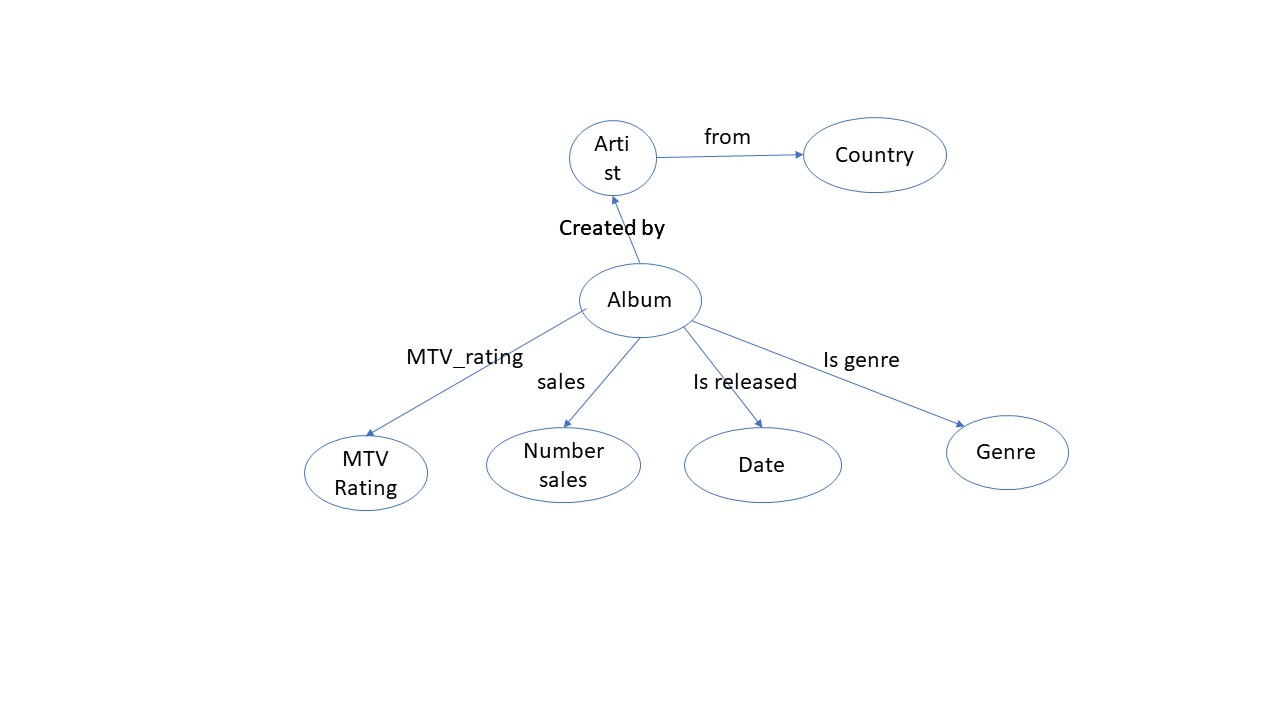

In [36]:
# display the graph
from IPython.display import Image
Image(filename='graph_model.jpg') 

## Task 2
Identify individuals (with their types) between them from Artists & Albums dataset, and
generate RDF triples based on your pre-defined vocabulary from Task 1. Assign unique URI
to each individual. You may produce your RDF file using different conversion tools.


In [25]:
#define namespaces
EXAL = Namespace('https://example.org/album/')
EXAR = Namespace('https://example.org/artist/')
PU = Namespace('http://purl.org/ontology/mo/')
DBO = Namespace('https://dbpedia.org/ontology/')
DBP = Namespace('https://dbpedia.org/property/')
SCH = Namespace('https://schema.org/')


genre = PU['Genre']
artist = PU['MusicArtist']
album = SCH['MusicAlbum']
country = SCH['Country']

birth_place = SCH['birthPlace']
is_genre = SCH['genre']
release_date = SCH['releaseDate']
sales = DBO['numberSold']
created_by = DBP['createdBy']
star_rating = SCH['starRating']
name = SCH["name"]



# import data
artists = pd.read_csv("data/artists.csv")
albums = pd.read_csv("data/albums.csv")


In [26]:
# iterate over all rows and add triples to graph

# create graph
g = Graph()

# Bind prefix to namespace
g.bind('exal', EXAL)
g.bind('exar', EXAR)
g.bind('pu', PU)
g.bind('dbo', DBO)
g.bind('dbp', DBP)
g.bind('sch', SCH)

# 1. add the artist
for i in range(len(artists)): 
    artist_uri = EXAR[str(artists.iloc[i,0])]

    # artist_id is type artist
    g.add((artist_uri, RDF.type, artist))
    # artist has name
    g.add((artist_uri, name, Literal(artists.iloc[i,1], datatype=XSD['string'])))
    # artist is from _ country
    g.add((artist_uri, birth_place, Literal(artists.iloc[i,5], datatype=XSD['string'])))


# 2. add all the albums
for i in range(len(albums)): 
    album_uri = EXAL[str(albums.iloc[i,0])]
    artist_uri = EXAR[str(albums.iloc[i,1])]

    # album is type album
    g.add((album_uri, RDF.type, album))
    # album has album name
    g.add((album_uri, name, Literal(albums.iloc[i,2], datatype=XSD['string'])))
    # album is created by artist
    g.add((album_uri, created_by, artist_uri))
    # album has star rating literal(double)
    g.add((album_uri, star_rating, Literal(albums.iloc[i,8], datatype=XSD['double'])))
    # album has number of sales literal(integer)
    g.add((album_uri, sales, Literal(albums.iloc[i,6], datatype=XSD['integer'])))
    # album has release date literal(date)
    g.add((album_uri, release_date, Literal(albums.iloc[i,4], datatype=XSD['integer'])))   
    # album has genre literal (str)
    g.add((album_uri, genre, Literal(albums.iloc[i,3], datatype=XSD['string'])))

We converted the dataset into an KG, however with the countries we ran into the problem with using real URI-s. Since the exact countynames are not always in the same vocabulary, we instead specified them as string literals. We also used ID-s for the graph to overcome the problem of potential duplictes and spaces, but we added both the artist and the album names with the "names" property.

In [ ]:
output = g.serialize(format='ttl')

In [35]:
# print turtle output for albums
print(output[0:1500])

@prefix dbo: <https://dbpedia.org/ontology/> .
@prefix dbp: <https://dbpedia.org/property/> .
@prefix exal: <https://example.org/album/> .
@prefix exar: <https://example.org/artist/> .
@prefix pu: <http://purl.org/ontology/mo/> .
@prefix sch: <https://schema.org/> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

exal:1 a sch:MusicAlbum ;
    pu:Genre "Folk"^^xsd:string ;
    dbo:numberSold 905193 ;
    dbp:createdBy exar:1767 ;
    sch:name "Call me Cat Moneyless That Doggies"^^xsd:string ;
    sch:releaseDate 2006 ;
    sch:starRating 1.5e+00 .

exal:10 a sch:MusicAlbum ;
    pu:Genre "Western"^^xsd:string ;
    dbo:numberSold 531099 ;
    dbp:createdBy exar:13687 ;
    sch:name "Rock"^^xsd:string ;
    sch:releaseDate 2002 ;
    sch:starRating 1e+00 .

exal:100 a sch:MusicAlbum ;
    pu:Genre "Rap"^^xsd:string ;
    dbo:numberSold 477347 ;
    dbp:createdBy exar:43510 ;
    sch:name "Photographer"^^xsd:string ;
    sch:releaseDate 2000 ;
    sch:starRating 1.5e+00 .

exal:1000 a

In [34]:
# show turtle output for artists
print(output[-1000:-1])


    sch:name "Galvin Riggs"^^xsd:string .

exar:36534 a pu:MusicArtist ;
    sch:birthPlace "United States"^^xsd:string ;
    sch:name "Doris Sykes"^^xsd:string .

exar:40017 a pu:MusicArtist ;
    sch:birthPlace "Norway"^^xsd:string ;
    sch:name "Meghan Z. Nichols"^^xsd:string .

exar:4044 a pu:MusicArtist ;
    sch:birthPlace "Chad"^^xsd:string ;
    sch:name "Addison A. Conway"^^xsd:string .

exar:44614 a pu:MusicArtist ;
    sch:birthPlace "Saint Martin"^^xsd:string ;
    sch:name "Urielle B. Abbott"^^xsd:string .

exar:47540 a pu:MusicArtist ;
    sch:birthPlace "Tuvalu"^^xsd:string ;
    sch:name "Nissim Norton"^^xsd:string .

exar:47714 a pu:MusicArtist ;
    sch:birthPlace "Egypt"^^xsd:string ;
    sch:name "Naomi Meyer"^^xsd:string .

exar:8330 a pu:MusicArtist ;
    sch:birthPlace "Korea South"^^xsd:string ;
    sch:name "Wesley Barton"^^xsd:string .

exar:10708 a pu:MusicArtist ;
    sch:birthPlace "Eritrea"^^xsd:string ;
    sch:name "Mallory W. Sheppard"^^xsd:string .



As displayed in the turtle output, the graph is now complete. 